# Supervised Learning

## SVM

* 타이타닉 탑승객 정보에 기반한 SVM 이용한 Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm 

In [2]:
# read data

titanic_df = pd.read_csv('data/passenger_data_set.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# tpyes of the columns

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# check null data & missing data

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# change the object types to category codes

titanic_df['Sex'] = titanic_df['Sex'].astype('category').cat.codes
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category').cat.codes
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked          int8
dtype: object

In [6]:
# filling missing data

mean_value = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(mean_value)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# filling missing data

titanic_df[['Cabin']] = np.where(titanic_df[['Cabin']].isnull(), 0, 1)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
# separate data

target = 'Survived'
X = titanic_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = titanic_df[target]

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,0,2
1,1,0,38.0,1,0,71.2833,1,0
2,3,0,26.0,0,0,7.9250,0,2
3,1,0,35.0,1,0,53.1000,1,2
4,3,1,35.0,0,0,8.0500,0,2


In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
# separate training set & testing set

X_train, X_test, y_train, y_test = train_test_split(X.values,y, test_size=0.9, random_state=100, stratify=y)

In [12]:
X_train.shape

(89, 8)

In [13]:
X_test.shape

(802, 8)

In [14]:
# SVM Model

svm = svm.SVC(kernel='linear', C=1)
svm

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
# trained data fitting to SVM Model

svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
# classification Score

svm.score(X_test, y_test)

0.7967581047381546

## Decision Tree

* 타이타닉 탑승객 정보에 기반한 Decision Tree 이용한 Classification

In [17]:
import pandas as pd
import pydotplus
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [18]:
# Decision Tree Model

dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
# trained data fitting to Decision Tree Model

dt = dt.fit(X_train, y_train)

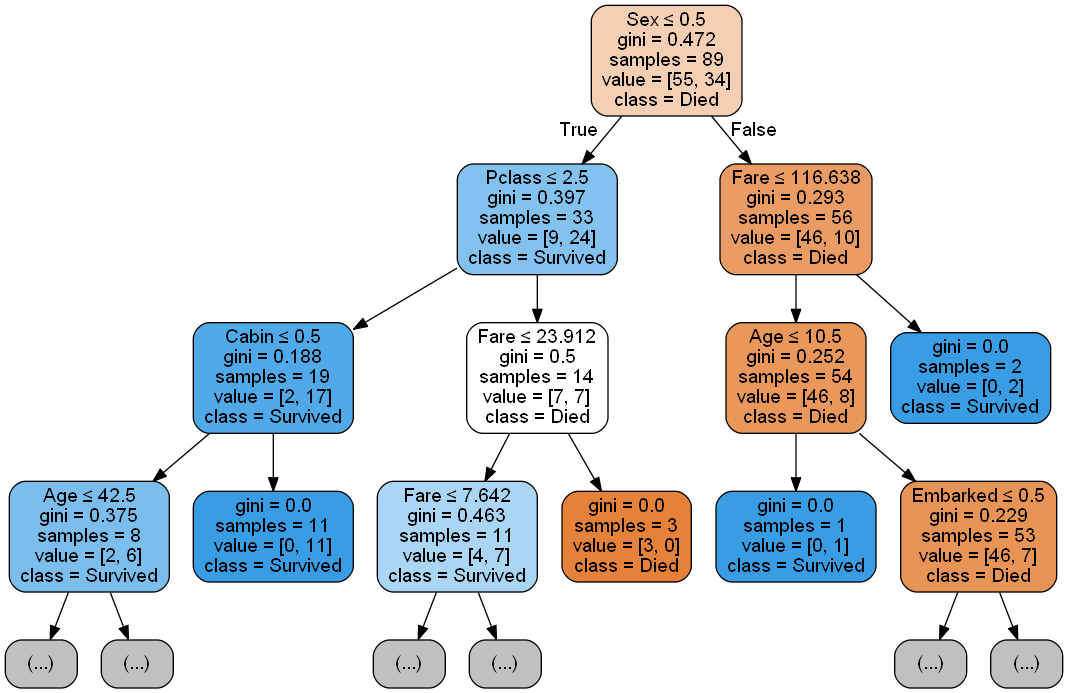

In [20]:
# Decision Tree Visualization

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               class_names=['Died', 'Survived'], max_depth=3, special_characters=True, feature_names=X.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
# Classification Score

dt.score(X_test, y_test)

0.7319201995012469